In [ ]:
!python mdp.py < ex.mdp

In [55]:
# pip install antlr4-python3-runtime
%reload_ext autoreload
%autoreload 2
from graphe import *

In [77]:
lexer = gramLexer(FileStream("ex.mdp"))
stream = CommonTokenStream(lexer)
parser = gramParser(stream)
tree = parser.program()
printer = gramPrintListener()
walker = ParseTreeWalker()
walker.walk(printer, tree)

In [78]:
graph = graphe("ex.mdp")

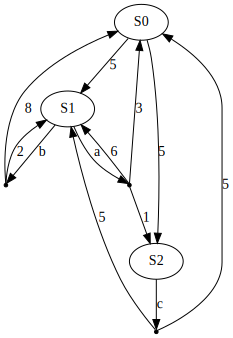

In [79]:
graph.visualizeGraphe()

In [75]:
test = "abc"

In [59]:
graph.transact

[['S1', 'b', ['S1', 'S0'], [2, 8]],
 ['S1', 'a', ['S2', 'S0', 'S1'], [1, 3, 6]],
 ['S2', 'c', ['S0', 'S1'], [5, 5]]]

In [51]:
import graphviz
dot = graphviz.Digraph('round-table', comment='The Round Table')

In [52]:
dot.node('A', 'King Arthur', shape='point')  
dot.node('B')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false', label='b_to_l')

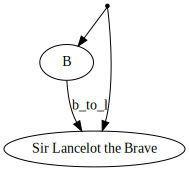

In [53]:
dot

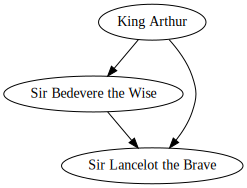

In [16]:
dot